<a href="https://colab.research.google.com/github/Atomao/model-compare-project/blob/main/shallow-models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data_url = 'https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv'



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
heart_disease = pd.read_csv(data_url)
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_disease.info(), heart_disease.shape, heart_disease.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(None, (303, 14), age           int64
 sex           int64
 cp            int64
 trestbps      int64
 chol          int64
 fbs           int64
 restecg       int64
 thalach       int64
 exang         int64
 oldpeak     float64
 slope         int64
 ca            int64
 thal          int64
 target        int64
 dtype: object)

In [ ]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


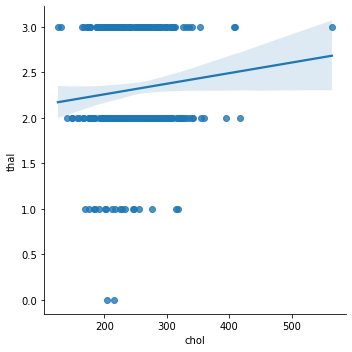

In [ ]:
sns.lmplot(data = heart_disease, x='chol', y= 'thal')

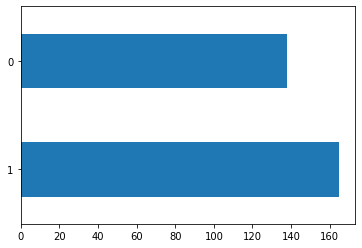

In [ ]:
heart_disease['target'].value_counts().plot(kind='barh')

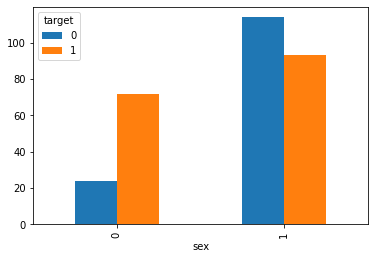

In [ ]:
pd.crosstab(heart_disease['sex'], heart_disease['target']).plot(kind = 'bar')

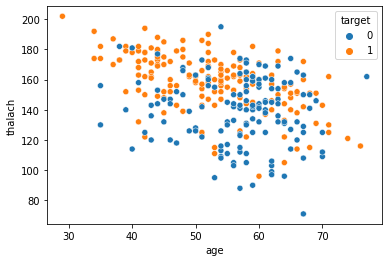

In [ ]:
sns.scatterplot(data = heart_disease, x = 'age', y = 'thalach', hue = 'target')

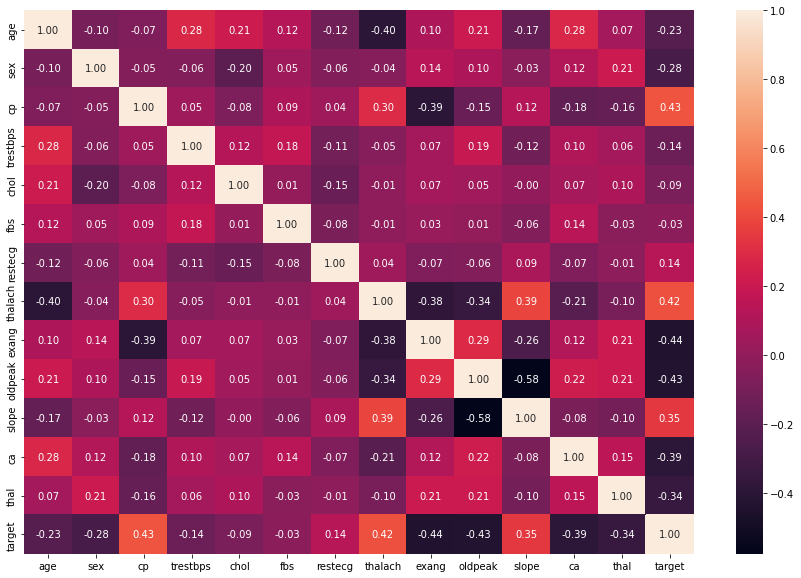

In [ ]:
plt.subplots(figsize = (15,10))
sns.heatmap(heart_disease.corr(), annot= True, fmt='.2f')

In [ ]:
from sklearn.model_selection import train_test_split

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import (
     ConfusionMatrixDisplay,
     RocCurveDisplay, 
     DetCurveDisplay,
     precision_score,
     recall_score,
    f1_score,
    classification_report
    )
from sklearn.preprocessing import MinMaxScaler




In [ ]:
models = {'LogisticRegression':LogisticRegression,
          'KNN': KNeighborsClassifier,
          'RandomForest':RandomForestClassifier,
          'Naive Bayes':GaussianNB,
          'Support Vector Classifier': SVC}

def fit_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(39)
  model_scores = dict()
  for name, model in models.items():
    model = model()
    model.fit(X = X_train, y= y_train)
    model_scores[name] = np.mean(cross_val_score(model,X_test, y_test))
  return model_scores

history = fit_score(models, X_train, X_test, y_train, y_test)
history

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'KNN': 0.8346153846153846,
 'LogisticRegression': 0.85,
 'Naive Bayes': 0.7346153846153847,
 'RandomForest': 0.8179487179487179,
 'Support Vector Classifier': 0.6230769230769231}

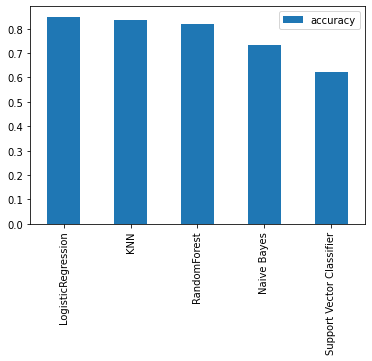

In [ ]:
mdl = pd.DataFrame(history, index = ['accuracy'])
mdl.T.plot(kind='bar')

In [ ]:
from sklearn import neighbors
train_scores = []
test_scores = []

neighbours = range(2,22)
knn = KNeighborsClassifier()

for i in neighbours:
  knn.set_params(n_neighbors=i)
  knn.fit(X_train, y_train)
  train_scores.append(knn.score(X_train, y_train))
  test_scores.append(knn.score(X_test,y_test))

test_scores


[0.5081967213114754,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.7377049180327869,
 0.8360655737704918,
 0.7377049180327869,
 0.7377049180327869,
 0.7049180327868853,
 0.7540983606557377,
 0.7704918032786885,
 0.819672131147541,
 0.8360655737704918,
 0.7868852459016393,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.8032786885245902,
 0.7868852459016393,
 0.7868852459016393]

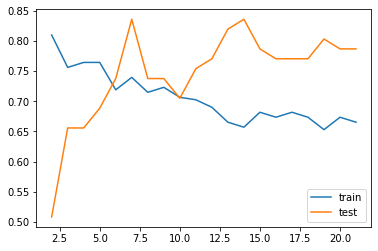

In [ ]:
plt.plot(neighbours, train_scores, label = 'train')
plt.plot(neighbours, test_scores, label = 'test')
plt.legend()
plt.show()

In [ ]:
log_reg_grid={'C':np.logspace(-4,4,20),
              'solver':['liblinear']}

rf_grid = {'n_estimators':np.arange(10,800,50),
           'max_depth':[None, 3,5,9],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,20,2)
           }
                               

In [ ]:
np.random.seed(39)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                n_iter=20,
                                cv=5,
                                verbose=True)

rs_log_reg.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_estimator_

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [ ]:
rs_log_reg.score(X_test,y_test)

0.9016393442622951

In [ ]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           n_iter=20,
                           cv=5,
                           verbose=True)

rs_rf.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 9],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760])},
                   verbose=True)

In [ ]:
rs_rf.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=17, n_estimators=310)

In [ ]:
rs_rf.score(X_test, y_test)

0.9016393442622951

In [ ]:
log_reg_grid= {'C':np.logspace(-4,4,30),
               'solver':['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,
                          cv=5, verbose=True)


gs_log_reg.fit(X, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gs_log_reg.best_estimator_,gs_log_reg.score(X_test,y_test)

(LogisticRegression(C=0.20433597178569418, solver='liblinear'),
 0.9016393442622951)

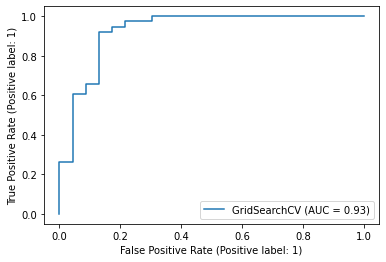

In [ ]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

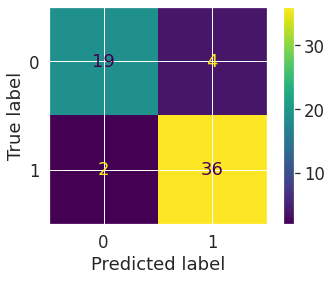

In [ ]:
ConfusionMatrixDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        23
           1       0.90      0.95      0.92        38

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.89        61
weighted avg       0.90      0.90      0.90        61



In [ ]:
same = LogisticRegression(**gs_log_reg.best_params_)

In [ ]:
cv_acc = cross_val_score(same, X,y).mean()
cv_acc

0.8446994535519124

In [ ]:
cv_acc.mean()

0.8446994535519124

In [ ]:
cv_prec = np.mean(cross_val_score(same, 
                          X,
                          y,
                          scoring = 'precision'))
cv_prec

0.8207936507936507

0.8207936507936507

In [ ]:
cv_f1 = cross_val_score(same,
                        X,y,
                        scoring='f1')
cv_f1 = cv_f1.mean()
cv_f1

0.8673007976269721

In [ ]:
cv_rec = cross_val_score(same,
                         X, y,
                         scoring='recall').mean()
cv_rec

0.9212121212121213

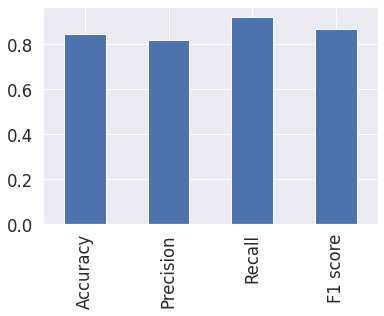

In [ ]:
cv_m = pd.DataFrame({'Accuracy':cv_acc,
                     'Precision': cv_prec,
                     'Recall': cv_rec,
                     'F1 score': cv_f1},  index= [0])

cv_m.T.plot.bar(legend=False)

In [ ]:
same.fit(X_train, y_train)
features = dict(zip(heart_disease.columns, list(same.coef_[0])))
features

{'age': 0.003621247828054047,
 'ca': -0.7186095244312742,
 'chol': -0.0009379536711624079,
 'cp': 0.7186549832554058,
 'exang': -0.543717894737416,
 'fbs': 0.025296952083918443,
 'oldpeak': -0.5223035059820229,
 'restecg': 0.24104233080305934,
 'sex': -0.791885536269074,
 'slope': 0.42941433687834807,
 'thal': -0.6185639255854875,
 'thalach': 0.02033853832542347,
 'trestbps': -0.009803188370312299}

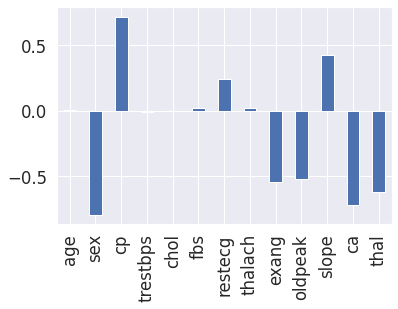

In [ ]:
pd.DataFrame(features, index=[0]).T.plot.bar(legend=False)